<a href="https://colab.research.google.com/github/andrepinotti/ICDS6-2024/blob/main/ProjetoHF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: André Pinotti

In [1]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

'POSITIVE'

In [9]:
from transformers import pipeline

analista_de_sentimentos = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english')

#testando o modelo de uma forma negativa
print(analista_de_sentimentos("Hello, my dog is cute"));

[{'label': 'POSITIVE', 'score': 0.9997830986976624}]


In [10]:
#testando a resposta da ia por
print(analista_de_sentimentos("Hello, my dog is bad"));

[{'label': 'NEGATIVE', 'score': 0.9989299178123474}]


In [11]:
pip install pysentimiento

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.5 MB/s eta 0:00:00


In [12]:
#usaremos um modelo de análise comportamental em português
from pysentimiento import create_analyzer

analista_sentimento_pt = create_analyzer(task="sentiment", lang="pt")

print(analista_sentimento_pt.predict("Eu estou feliz, ando meio ansioso, inseguro, porém estou de bem com a vida"))

config.json:   0%|          | 0.00/952 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/562 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/799k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


AnalyzerOutput(output=NEU, probas={NEU: 0.717, POS: 0.230, NEG: 0.053})


In [16]:
#a saída acima resulta em bem mais uma neutralidade, vamos testar uma vez negativo e uma vez positivo

print(analista_sentimento_pt.predict("Eu estou feliz, estou de bem com a vida, adoro as coisas do jeito que são"))

AnalyzerOutput(output=POS, probas={POS: 0.941, NEU: 0.054, NEG: 0.004})


In [17]:
print(analista_sentimento_pt.predict("Eu estou triste, ansioso e capenga"))

AnalyzerOutput(output=NEG, probas={NEG: 0.768, NEU: 0.205, POS: 0.027})


Aplicaremos uma análise de sentimentos em um conjunto de dados de um ecommerce em nosso arquivo csv.

In [19]:
import pandas as pd
dados = pd.read_csv("resenhas.csv")
print(dados.head())

    ID                                            Resenha
0   24  A fritadeira é sensacional, muito além do que ...
1  733  Após usar o produto, achei-o fácil e muito efi...
2  865                Muito funcional, prática e moderna.
3  809  Boa, mas não das melhores pois a frente de vid...
4  628  Eu comecei a usar e é bem espaçosa. Gostei poi...


In [23]:
analise_csv = analista_sentimento_pt.predict(dados["Resenha"])

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

In [24]:
print(analise_csv)

[AnalyzerOutput(output=POS, probas={POS: 0.989, NEU: 0.009, NEG: 0.002}), AnalyzerOutput(output=POS, probas={POS: 0.670, NEU: 0.320, NEG: 0.011}), AnalyzerOutput(output=POS, probas={POS: 0.900, NEU: 0.097, NEG: 0.003}), AnalyzerOutput(output=NEG, probas={NEG: 0.731, NEU: 0.259, POS: 0.010}), AnalyzerOutput(output=POS, probas={POS: 0.976, NEU: 0.021, NEG: 0.003}), AnalyzerOutput(output=POS, probas={POS: 0.956, NEU: 0.037, NEG: 0.007}), AnalyzerOutput(output=POS, probas={POS: 0.838, NEU: 0.093, NEG: 0.069}), AnalyzerOutput(output=POS, probas={POS: 0.990, NEU: 0.008, NEG: 0.002}), AnalyzerOutput(output=POS, probas={POS: 0.961, NEU: 0.036, NEG: 0.003}), AnalyzerOutput(output=POS, probas={POS: 0.990, NEU: 0.007, NEG: 0.003}), AnalyzerOutput(output=NEG, probas={NEG: 0.896, NEU: 0.100, POS: 0.004}), AnalyzerOutput(output=NEG, probas={NEG: 0.990, NEU: 0.008, POS: 0.003}), AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.003}), AnalyzerOutput(output=NEU, probas={NEU: 0.599, POS

In [26]:
#Podemos deixar todo o resultado mais organizado, trazendo o resultado parcial
#cada resenha
resposta = []
for analise in analise_csv:
    resposta.append(analise.output)
print(resposta)

['POS', 'POS', 'POS', 'NEG', 'POS', 'POS', 'POS', 'POS', 'POS', 'POS', 'NEG', 'NEG', 'NEG', 'NEU', 'NEG', 'NEG', 'NEG', 'NEU', 'NEG', 'NEG', 'NEU', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'NEG', 'POS', 'POS', 'NEU', 'POS', 'POS']


In [35]:
#Adicionaremos uma coluna onde ela receberá as respostas da sapidas
# que acumulamos em um array
dados['Resposta'] = resposta
print(dados)

     ID                                            Resenha resposta Resposta
0    24  A fritadeira é sensacional, muito além do que ...      POS      POS
1   733  Após usar o produto, achei-o fácil e muito efi...      POS      POS
2   865                Muito funcional, prática e moderna.      POS      POS
3   809  Boa, mas não das melhores pois a frente de vid...      NEG      NEG
4   628  Eu comecei a usar e é bem espaçosa. Gostei poi...      POS      POS
5   657  Usei ela algumas vezes já, muito silenciosa, l...      POS      POS
6   182  Superou minhas expectativas, por enquanto tudo...      POS      POS
7   815  Chegou no prazo. Amei, é muito linda. Não vejo...      POS      POS
8   343  Estou muito satisfeito com a negociação, receb...      POS      POS
9   624                         Lindaaaa amei super indico      POS      POS
10  365  A fritadeira é ok, mas desde os primeiros dias...      NEG      NEG
11  543  O produto em si é bom, porém oxida, infelizmen...      NEG      NEG

In [37]:
#Quando importamos o pandas, fizemos um teste rapido mostrando o 'cabeçalho' do conjunto de dados
#Para deixar o retorno melhor visualmente, podemos criar um dataframe com suas infro
df_analise = dados.groupby('Resenha').value_counts().reset_index(name='Contagem')
df_analise.head()

,Resenha,ID,resposta,Resposta,Contagem
0,"A fritadeira é ok, mas desde os primeiros dias...",365,NEG,NEG,1
1,"A fritadeira é sensacional, muito além do que ...",24,POS,POS,1
2,Achei bem boa e super fácil de usar! Recomendo,47,POS,POS,1
3,"Além de enferrujar, estourou o vidro do nada",735,NEG,NEG,1
4,"Aparelho bom, mas a sua tampa enferrujou muito...",21,NEU,NEU,1


In [38]:
#Iremos criar gráficos através dessa
import plotly.express as px
pic = px.bar(df_analise, x='Resposta', y='Contagem', title='Contador de resenhas por sentimento')
pic.show()

Iremos aproveitar e usar outra biblioteca


In [70]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
stopwords_pt = stopwords.words('portuguese')
print(stopwords_pt)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

Criaremos uma função para gerar word clouds

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [67]:
def nuvem(texto, coluna, resposta):
  #Filtrando as resenhas com base no sentimento especificado
  texto_resposta = texto.query(f"Resposta == '{resposta}'")[coluna]

  #Unindo todas as resenhas em uma única string
  texto_unico = ' '.join(texto_resposta)

  #Dividindo o texto em palavras e filtrando com stopwords
  palavras = texto_unico.split()
  palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stopwords_pt]
  texto_sem_stopwords = ' '.join(palavras_sem_stopwords)

  nuvem_palavras = WordCloud(width=800, height=400, max_words=50).generate(texto_sem_stopwords)
  plt.figure(figsize=(10,5))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()



Nuvem de palavra de resenhas positivas



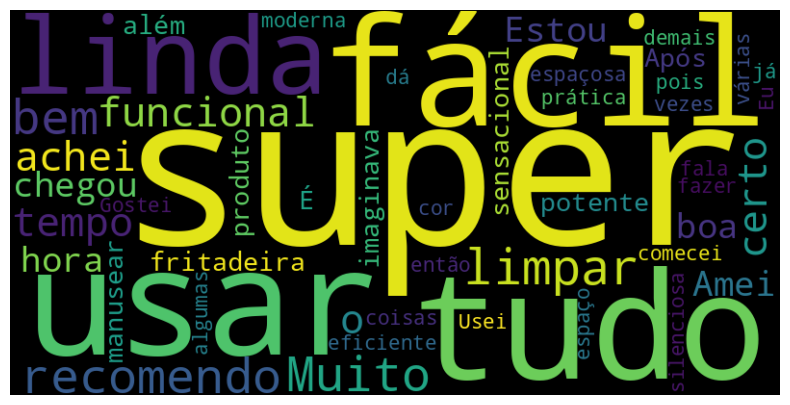

In [74]:
nuvem(dados, 'Resenha', 'POS')

Nuvem de palavra de resenhas positivas

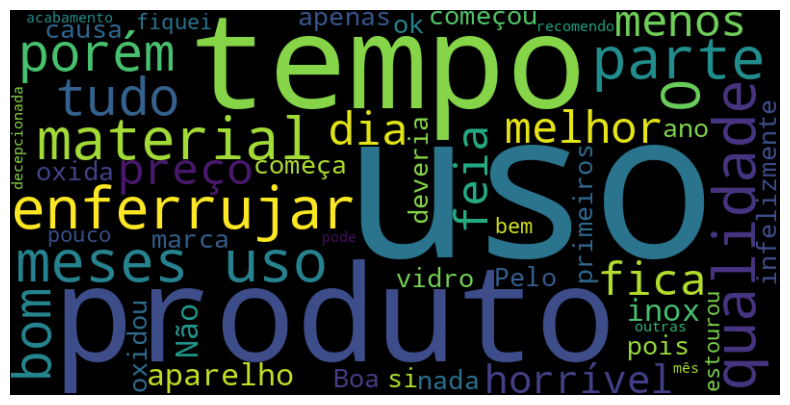

In [75]:
nuvem(dados, 'Resenha', 'NEG')